In [2]:
# Import libraries
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # Adjusts the configuration of the plots we will create

In [3]:
# Read in the data

df = pd.read_csv(r'/Users/lauren/Data Portfolio Projects/movies.csv')

In [4]:
# Looking at the data
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [5]:
# Missing Data Check
# Percentage of missing data
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

# Sum of missing data
df[['budget', 'gross']].isna().sum()

# Fill missing data with median
df['budget'] = df['budget'].fillna(df['budget'].median())
df['gross'] = df['gross'].fillna(df['budget'].median())

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [6]:
# Data typyes for columns

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [7]:
# Changing the columns data type
df['budget'] = df['budget'].astype('Int64')
df['gross'] = df['gross'].astype('Int64')
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [8]:
# Creating a correct year column
# Adjusting date format
df['cleandate'] = df['released'].str.extract(r'([A-Za-z]+\s+\d{1,2},\s+\d{4})')
df['cleandate'] = pd.to_datetime(df['cleandate'])
df.head()

# Adjust the year column for correct year
df['yearcorrect'] = df['cleandate'].astype(str).str[:4]
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,cleandate,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980-06-13,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980-07-02,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980-06-20,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980-07-02,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980-07-25,1980


In [13]:
pd.set_option('display.max_rows', None)

In [9]:
# Drop and duplicates
df['company'].drop_duplicates().sort_values(ascending=False)


7129                                thefyzz
5664                            micro_scope
6412               iDeal Partners Film Fund
4007                               i5 Films
6793                             i am OTHER
                       ...                 
3748                     1+2 Seisaku Iinkai
3024                        .406 Production
7525    "Weathering With You" Film Partners
4345        "DIA" Productions GmbH & Co. KG
408                                     NaN
Name: company, Length: 2386, dtype: object

<function matplotlib.pyplot.show(close=None, block=None)>

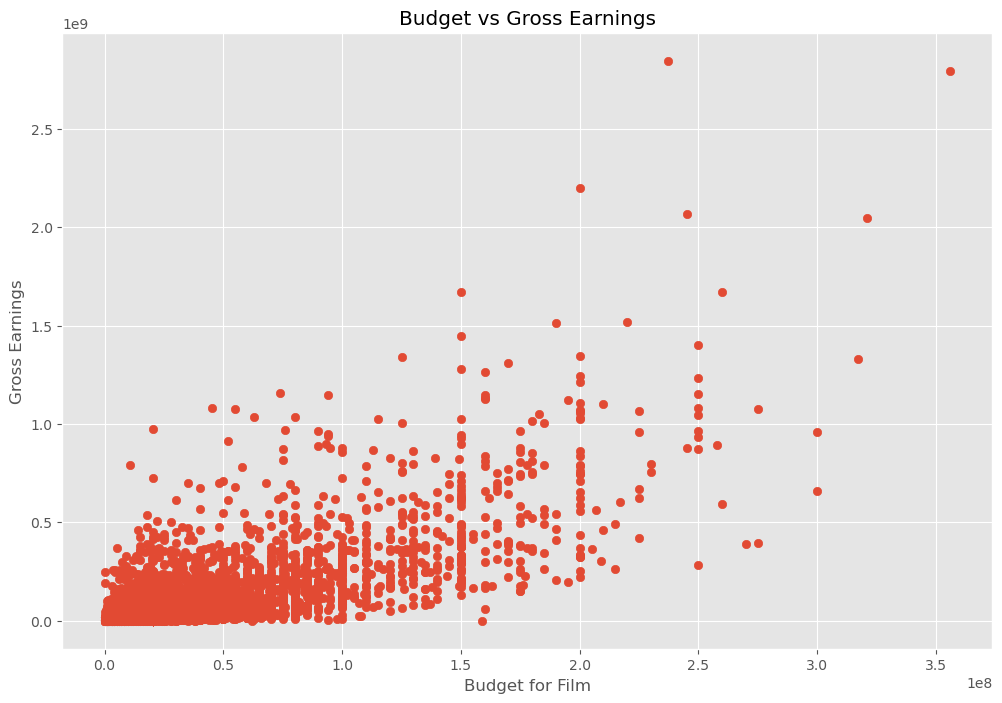

In [10]:
# Scatter plot with budget vs gross revenue
plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Budget for Film')
plt.ylabel('Gross Earnings')

plt.show

In [11]:
top_budget = df.nlargest(100, 'budget')
top_budget[['name', 'company','gross','budget']].head(10)

,name,company,gross,budget
7445,Avengers: Endgame,Marvel Studios,2797501328,356000000
7244,Avengers: Infinity War,Marvel Studios,2048359754,321000000
7075,Star Wars: Episode VIII - The Last Jedi,Walt Disney Pictures,1332698830,317000000
5060,Pirates of the Caribbean: at World's End,Walt Disney Pictures,960996492,300000000
7066,Justice League,Warner Bros.,657926987,300000000
7261,Solo: A Star Wars Story,Lucasfilm,392924807,275000000
7463,Star Wars: Episode IX - The Rise of Skywalker,Walt Disney Pictures,1078232589,275000000
4870,Superman Returns,Warner Bros.,391081192,270000000
5658,Tangled,Walt Disney Animation Studios,592462816,260000000
7480,The Lion King,Walt Disney Pictures,1670727580,260000000


<Axes: xlabel='budget', ylabel='gross'>

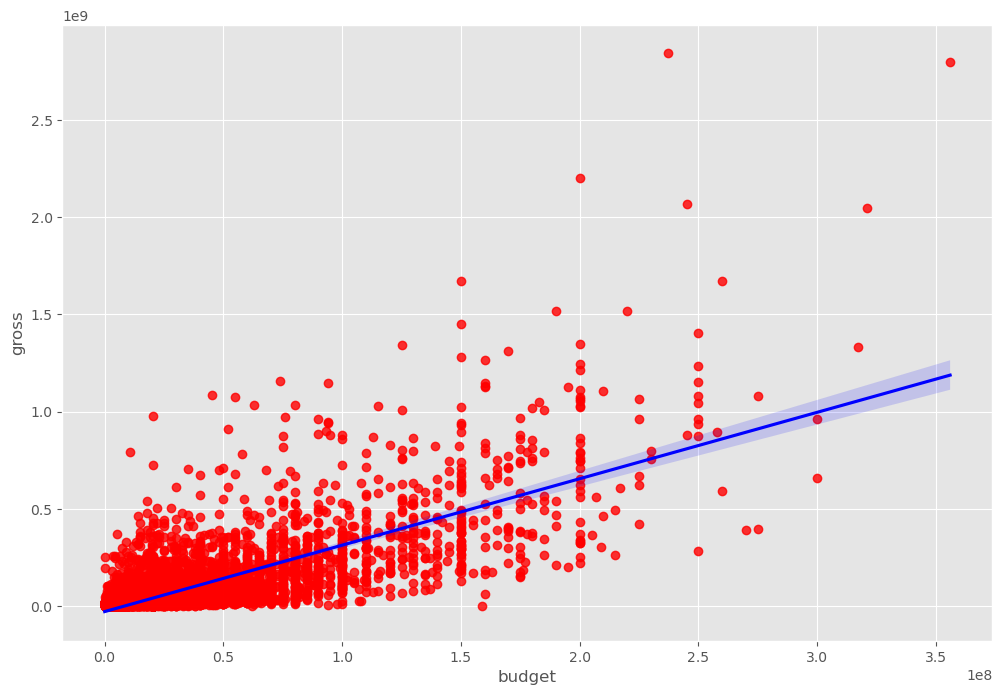

In [12]:
# Plot the budget vs gross using seaborn
df['budget'] = df['budget'].astype(float)
df['gross'] = df['gross'].astype(float)

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color": "red"}, line_kws={"color": "blue"})

In [13]:
# Exploring correlations
df.corr(method='pearson', numeric_only=True) # Pearson correlation
# Linear relationship

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.291690,0.259469,0.120811
score,0.097995,1.000000,0.409182,0.061979,0.185571,0.399451
votes,0.222945,0.409182,1.000000,0.460932,0.632091,0.309212
budget,0.291690,0.061979,0.460932,1.000000,0.745873,0.273363
gross,0.259469,0.185571,0.632091,0.745873,1.000000,0.244346
runtime,0.120811,0.399451,0.309212,0.273363,0.244346,1.000000


In [14]:
print(df.select_dtypes(include='number').columns)
print(df.corr(numeric_only=True))

Index(['year', 'score', 'votes', 'budget', 'gross', 'runtime'], dtype='object')
             year     score     votes    budget     gross   runtime
year     1.000000  0.097995  0.222945  0.291690  0.259469  0.120811
score    0.097995  1.000000  0.409182  0.061979  0.185571  0.399451
votes    0.222945  0.409182  1.000000  0.460932  0.632091  0.309212
budget   0.291690  0.061979  0.460932  1.000000  0.745873  0.273363
gross    0.259469  0.185571  0.632091  0.745873  1.000000  0.244346
runtime  0.120811  0.399451  0.309212  0.273363  0.244346  1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

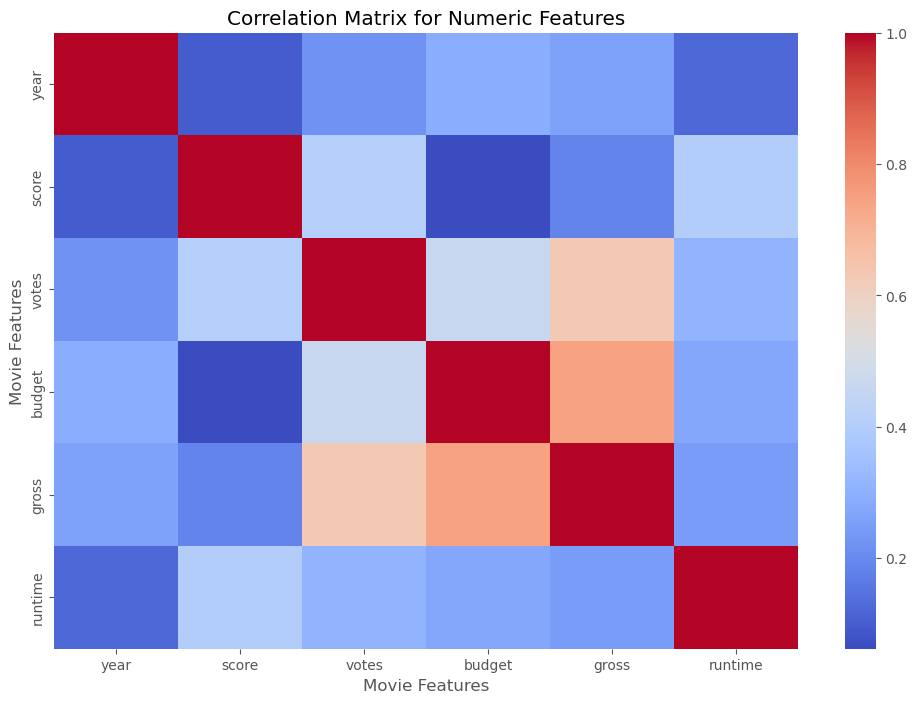

In [15]:
# Correlation Matrix
correlation_matrix = df.corr(method='pearson', numeric_only=True)


sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show

In [16]:
# Exploring Compnay Data
df['budget'] = df['budget'].astype('Int64')
df['gross'] = df['gross'].astype('Int64')

df_numerized = df
for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,cleandate,yearcorrect
0,6587,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000,46998772,2319,146.0,1980-06-13,0
1,5573,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000,58853106,731,104.0,1980-07-02,0
2,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000,538375067,1540,124.0,1980-06-20,0
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000,83453539,1812,88.0,1980-07-02,0
4,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000,39846344,1777,98.0,1980-07-25,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,3705,-1,6,2020,2964,3.1,18.0,1500,2289,2421,55,7000,20500000,-1,90.0,2020-10-23,40
7664,1678,-1,4,2020,1107,4.7,36.0,774,2614,1886,55,20500000,20500000,539,90.0,2020-02-07,40
7665,4717,-1,6,2020,193,5.7,29.0,2061,2683,2040,55,58750,20500000,941,NaN,2020-04-27,40
7666,2843,-1,6,2020,2817,NaN,NaN,1184,1824,450,55,15000,20500000,-1,120.0,2020-10-01,40


<function matplotlib.pyplot.show(close=None, block=None)>

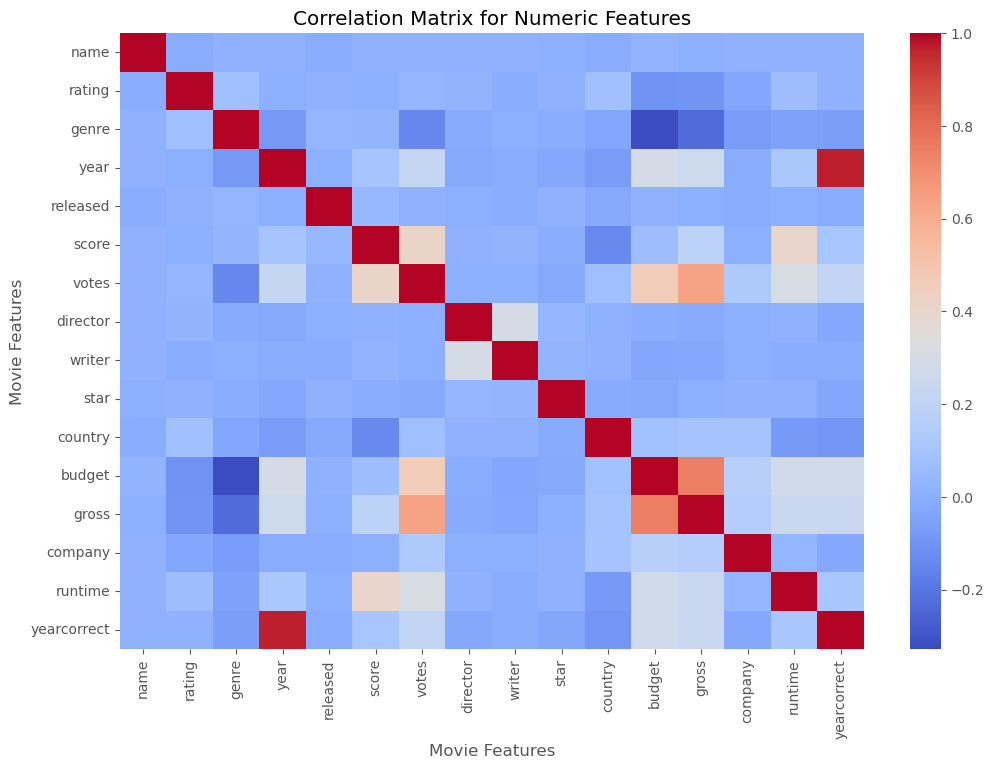

In [17]:
# Correlation Matrix
correlation_matrix = df_numerized.corr(method='pearson', numeric_only=True)


sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show

In [18]:
print(df_numerized.select_dtypes(include='number').columns)
print(df_numerized.corr(numeric_only=True))

Index(['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross', 'company',
       'runtime', 'yearcorrect'],
      dtype='object')
                 name    rating     genre      year  released     score  \
name         1.000000 -0.008069  0.016355  0.011453 -0.011311  0.017097   
rating      -0.008069  1.000000  0.072423  0.008779  0.016613 -0.001314   
genre        0.016355  0.072423  1.000000 -0.081261  0.029822  0.027965   
year         0.011453  0.008779 -0.081261  1.000000 -0.000695  0.097995   
released    -0.011311  0.016613  0.029822 -0.000695  1.000000  0.042788   
score        0.017097 -0.001314  0.027965  0.097995  0.042788  1.000000   
votes        0.013088  0.033225 -0.145307  0.222945  0.016097  0.409182   
director     0.009079  0.019483 -0.015258 -0.020795 -0.001478  0.009559   
writer       0.009081 -0.005921  0.006567 -0.008656 -0.002404  0.019416   
star         0.006472  0.013405 -0.005477 -0

In [19]:
correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()

In [20]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

budget       genre         -0.328484
genre        budget        -0.328484
             gross         -0.233371
gross        genre         -0.233371
genre        votes         -0.145307
                              ...   
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
cleandate    cleandate      1.000000
yearcorrect  yearcorrect    1.000000
Length: 289, dtype: float64

In [21]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr

gross        votes          0.632091
votes        gross          0.632091
budget       gross          0.745873
gross        budget         0.745873
year         yearcorrect    0.967486
yearcorrect  year           0.967486
name         name           1.000000
writer       writer         1.000000
runtime      runtime        1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
cleandate    cleandate      1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64

In [ ]:
# Votes & Budget have the highest correelation to gross earnings